In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [ ]:
!pip install python-docx


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 3.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

def preprocess_data(input_csv):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(input_csv)

    print("Available columns:")
    print(df.columns)

    # Convert time columns to datetime
    time_columns = [col for col in df.columns if 'Time' in col or 'time' in col]
    for col in time_columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

    # Filter out 'active' flights only if the status column exists
    if 'status' in df.columns:
        df = df[df['status'] == 'active']

    # Calculate delay time if necessary columns exist
    if 'departure_scheduledTime' in df.columns and 'departure_actualTime' in df.columns:
        df['delay_time'] = (df['departure_actualTime'] - df['departure_scheduledTime']).dt.total_seconds() / 60
    elif 'delay' in df.columns:
        df['delay_time'] = pd.to_numeric(df['delay'], errors='coerce')
    else:
        print("Warning: Unable to calculate delay time. Please ensure 'delay' or departure time columns are present.")

    # Remove rows where delay_time is NaN
    df = df.dropna(subset=['delay_time'])

    # Convert numeric columns and handle errors
    for col in df.columns:
        if df[col].dtype == 'object':
            try:
                df[col] = pd.to_numeric(df[col], errors='coerce')
            except ValueError:
                # Fill non-numeric values with NaN
                df[col] = pd.to_numeric(df[col], errors='coerce')

    # Fill remaining NaN values (optional: you can drop rows instead)
    df = df.fillna(df.median(numeric_only=True))

    return df

# Example usage:
input_csv = '/content/drive/MyDrive/Flights Data/Flights Data/combined_flight_data.csv'  # Replace with your actual input CSV file path
flight_df = preprocess_data(input_csv)

# Now `flight_df` contains the processed data


Available columns:
Index(['type', 'status', 'departure_iataCode', 'departure_icaoCode',
       'departure_terminal', 'departure_delay', 'departure_scheduledTime',
       'departure_estimatedTime', 'arrival_iataCode', 'arrival_icaoCode',
       'arrival_scheduledTime', 'airline_name', 'airline_iataCode',
       'airline_icaoCode', 'flight_number', 'flight_iataNumber',
       'flight_icaoNumber', 'codeshared_airline_name',
       'codeshared_airline_iataCode', 'codeshared_airline_icaoCode',
       'codeshared_flight_number', 'codeshared_flight_iataNumber',
       'codeshared_flight_icaoNumber', 'arrival_terminal',
       'departure_actualTime', 'departure_estimatedRunway',
       'departure_actualRunway', 'arrival_estimatedTime', 'arrival_baggage',
       'arrival_delay', 'arrival_gate', 'departure_gate', 'arrival_actualTime',
       'arrival_estimatedRunway', 'arrival_actualRunway'],
      dtype='object')


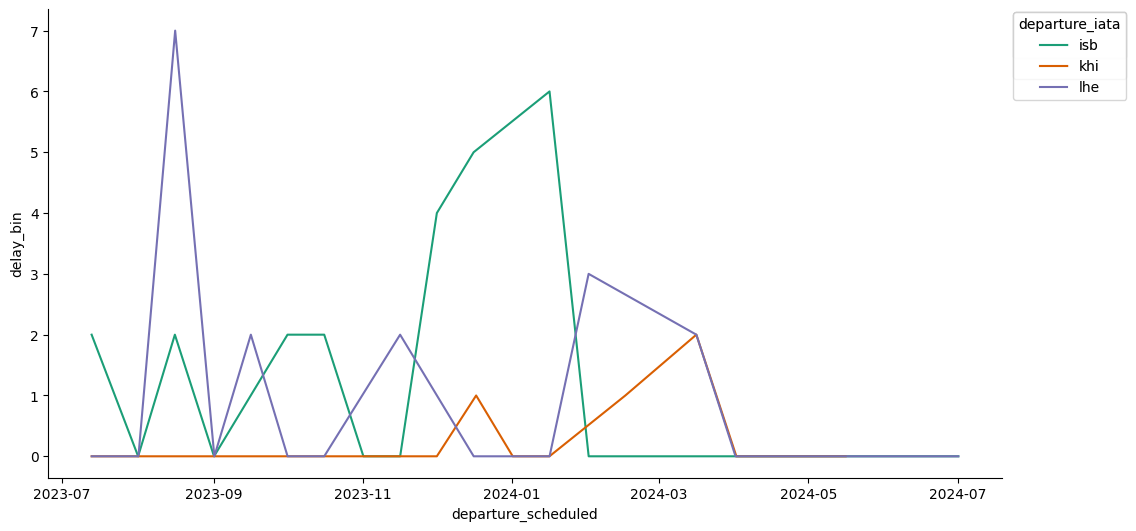

In [ ]:
# @title departure_scheduled vs delay_bin

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['departure_scheduled']
  ys = series['delay_bin']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = flight_df.sort_values('departure_scheduled', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('departure_iata')):
  _plot_series(series, series_name, i)
  fig.legend(title='departure_iata', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('departure_scheduled')
_ = plt.ylabel('delay_bin')

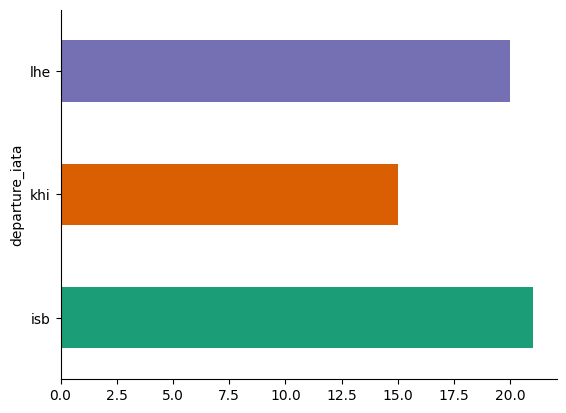

In [ ]:
# @title departure_iata

from matplotlib import pyplot as plt
import seaborn as sns
flight_df.groupby('departure_iata').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

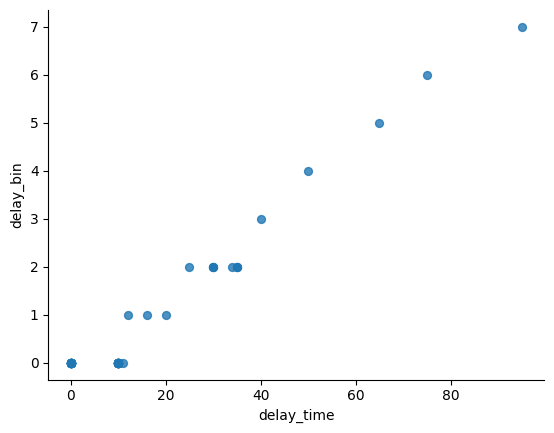

In [ ]:
# @title delay_time vs delay_bin

from matplotlib import pyplot as plt
flight_df.plot(kind='scatter', x='delay_time', y='delay_bin', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

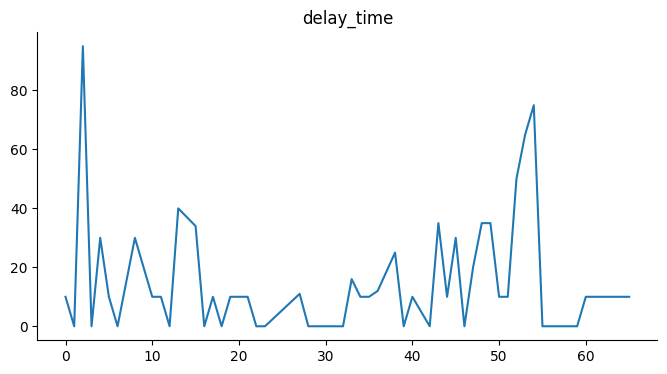

In [ ]:
# @title delay_time

from matplotlib import pyplot as plt
flight_df['delay_time'].plot(kind='line', figsize=(8, 4), title='delay_time')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Check available columns to ensure correct names
print("Available columns in flight_df:")
print(flight_df.columns)

# Binning the delay_time into 8 bins
flight_df['delay_bin'] = pd.cut(flight_df['delay_time'], bins=8, labels=False)

# Select the features for the model, using correct column names
features = ['departure_iataCode', 'arrival_iataCode', 'airline_name', 'flight_number']
missing_features = [col for col in features if col not in flight_df.columns]

if missing_features:
    print(f"Error: Missing columns in flight_df - {missing_features}")
else:
    X = flight_df[features]
    y = flight_df['delay_bin']

    # Convert categorical variables to numerical using one-hot encoding
    X = pd.get_dummies(X)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    print("Data preprocessing and splitting completed successfully.")


Available columns in flight_df:
Index(['type', 'status', 'departure_iataCode', 'departure_icaoCode',
       'departure_terminal', 'departure_delay', 'departure_scheduledTime',
       'departure_estimatedTime', 'arrival_iataCode', 'arrival_icaoCode',
       'arrival_scheduledTime', 'airline_name', 'airline_iataCode',
       'airline_icaoCode', 'flight_number', 'flight_iataNumber',
       'flight_icaoNumber', 'codeshared_airline_name',
       'codeshared_airline_iataCode', 'codeshared_airline_icaoCode',
       'codeshared_flight_number', 'codeshared_flight_iataNumber',
       'codeshared_flight_icaoNumber', 'arrival_terminal',
       'departure_actualTime', 'departure_estimatedRunway',
       'departure_actualRunway', 'arrival_estimatedTime', 'arrival_baggage',
       'arrival_delay', 'arrival_gate', 'departure_gate', 'arrival_actualTime',
       'arrival_estimatedRunway', 'arrival_actualRunway', 'delay_time'],
      dtype='object')
Data preprocessing and splitting completed successfully

In [ ]:
#SVM
class SVM:
    def __init__(self, kernel='linear', C=1.0):
        self.C = C
        self.kernel = kernel
        self.w = None
        self.b = None

    def fit(self, X, y, epochs=1000, lr=0.001):
        n_samples, n_features = X.shape

        # Initialize weights
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(epochs):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= lr * (2 * self.w)
                else:
                    self.w -= lr * (2 * self.w - np.dot(x_i, y[idx]))
                    self.b -= lr * y[idx]

    def predict(self, X):
        return np.sign(np.dot(X, self.w) - self.b)


In [ ]:
#Decision Tree
class DecisionTree:
    def __init__(self, max_depth=5, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def fit(self, X, y):
        self.tree = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # Check for empty y
        if depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samples_split or len(y) == 0:
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_features, n_features, replace=False)

        best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)
        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)

        # Check for empty splits
        if len(left_idxs) > 0:
            left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        else:
            left = Node(value=self._most_common_label(y))
        if len(right_idxs) > 0:
            right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        else:
            right = Node(value=self._most_common_label(y))

        return Node(best_feat, best_thresh, left, right)

    def _best_criteria(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            for thresh in thresholds:
                gain = self._information_gain(y, X_column, thresh)
                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = thresh
        return split_idx, split_thresh

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _information_gain(self, y, X_column, split_thresh):
        parent_entropy = self._entropy(y)
        left_idxs, right_idxs = self._split(X_column, split_thresh)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r

        ig = parent_entropy - child_entropy
        return ig

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log2(p) for p in ps if p > 0])

    def _most_common_label(self, y):
        if len(y) == 0: # Return a default value if y is empty
            return 0
        return np.bincount(y).argmax()
    def predict(self, X):
        return np.array([self._traverse_tree(x, self.tree) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value
        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None


In [ ]:
#logistic Regg
class LogisticRegression:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))


In [ ]:
class StackingEnsemble:
    def __init__(self, base_models, meta_model):
        """
        base_models: list of models to be used as the base learners (e.g., SVM, Decision Tree, etc.)
        meta_model: the model used as the meta-learner (e.g., Logistic Regression)
        """
        self.base_models = base_models
        self.meta_model = meta_model

    def fit(self, X, y):
        """
        Train each of the base models on the training data and then train the meta-model
        on the predictions from the base models.
        """
        # Create an empty array to store predictions from base models for meta-model training
        meta_features = np.zeros((X.shape[0], len(self.base_models)))

        # Train each base model and store predictions
        for idx, model in enumerate(self.base_models):
            model.fit(X, y)
            # Generate predictions (train set) for each model and store them as meta-features
            meta_features[:, idx] = model.predict(X)

        # Train the meta-model using the predictions of base models as input features
        self.meta_model.fit(meta_features, y)

    def predict(self, X):
        """
        Generate predictions using base models, then use those predictions as input for
        the meta-model to make the final prediction.
        """
        # Create an empty array to store predictions from base models for meta-model prediction
        meta_features = np.zeros((X.shape[0], len(self.base_models)))

        # Generate predictions from each base model and store them as meta-features
        for idx, model in enumerate(self.base_models):
            meta_features[:, idx] = model.predict(X)

        # Use the meta-model to make the final prediction
        return self.meta_model.predict(meta_features)


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score

# Instantiate base models
svm = make_pipeline(
    SimpleImputer(strategy='mean'),  # Impute missing values with the mean
    SVC(kernel='linear')
)

decision_tree = DecisionTreeClassifier(max_depth=2)
log_reg_base = LogisticRegression(C=0.01, max_iter=100)

# Define meta-model using scikit-learn's Logistic Regression
meta_model = LogisticRegression()

# Combine models into a stacking ensemble
stacking_ensemble_model = StackingClassifier(
    estimators=[('svm', svm), ('decision_tree', decision_tree), ('log_reg', log_reg_base)],
    final_estimator=meta_model
)

# Impute missing values in X_train and X_test
imputer = SimpleImputer(strategy='mean') # Create an imputer object
X_train_imputed = imputer.fit_transform(X_train.values) # Fit and transform on the training data
X_test_imputed = imputer.transform(X_test.values) # Transform the test data

# Train the stacking ensemble
stacking_ensemble_model.fit(X_train_imputed, y_train.values)

# Make predictions using the stacking ensemble
y_pred = stacking_ensemble_model.predict(X_test_imputed)

# Evaluate the ensemble
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: [0 1 2]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: [0 1 2]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.

Accuracy: 0.9932315767663513
F1 Score: 0.9900079733188647
